In [16]:
import numpy as np
import scipy
import cv2 as cv

from matplotlib import pyplot as plt
from matplotlib import cm
from skimage import io

from skimage.feature import canny
from skimage.morphology import disk
from skimage.filters import sobel_v, sobel_h, gaussian, laplace
from scipy.ndimage import gaussian_filter, gaussian_laplace

In [17]:
FIG_SIZE = 16,9

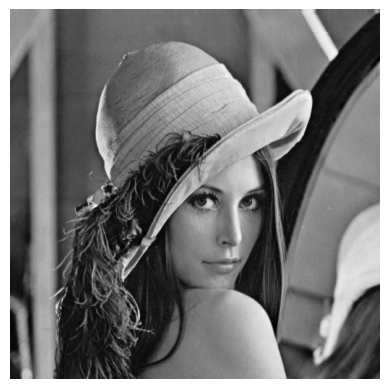

In [18]:
lenna_img = io.imread('lenna.jpg')
disk_img = disk(128)
sq_img = np.zeros((13, 13))
sq_img[6][6] = 1

img = lenna_img
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

### Gaussian functions

In [19]:
def gaussian_f(x, y, sigma):
    """
    Computes 2d Gaussian function w/ formula from lecture
    """
    return 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 / (2 * sigma ** 2) + y ** 2 / (2 * sigma ** 2)))


def gaussian_dx_f(x, y, sigma):
    """
    Computes first order x-derivative of the Gaussian
    """
    return -x / (2 * np.pi * sigma ** 4) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))


def gaussian_dy_f(x, y, sigma):
    """
    Computes first order y-derivative of the Gaussian
    """
    return -y / (2 * np.pi * sigma ** 4) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))


def gaussian_d2x_f(x, y, sigma):
    """
    Computes second order x-derivative of the Gaussian
    """
    return (-1 + x ** 2 / sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 4)


def gaussian_d2y_f(x, y, sigma):
    """
    Computes second order y-derivative of the Gaussian
    """
    return (-1 + y ** 2 / sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 4)


def laplace_gaussian(x, y, sigma):
    """
    Computes Laplacian of a Gaussian
    """
    return gaussian_d2x_f(x, y, sigma) + gaussian_d2y_f(x, y, sigma)
    # return (-1 / (np.pi * sigma ** 4)) * (1 - (x ** 2 + y ** 2) / (2 * sigma ** 2)) * np.exp(
    #     -(x ** 2 + y ** 2) / (2 * sigma ** 2))


def get_gaussian_kernel(size, sigma, func):
    """
    Computes convolution kernel through a Gaussian function to obtain gaussian filtering / gradient magnitude
    """
    limit = size // 2
    x = np.arange(-limit, limit)
    y = np.arange(-limit, limit)
    x, y = np.meshgrid(x, y)
    z = func(x, y, sigma)

    return x, y, z

### Task 1: Gaussian Filtering

#### Using mathematical formula

In [20]:
SIGMAS = [1, 2, 4, 8]
KERNEL_SIZE = 51

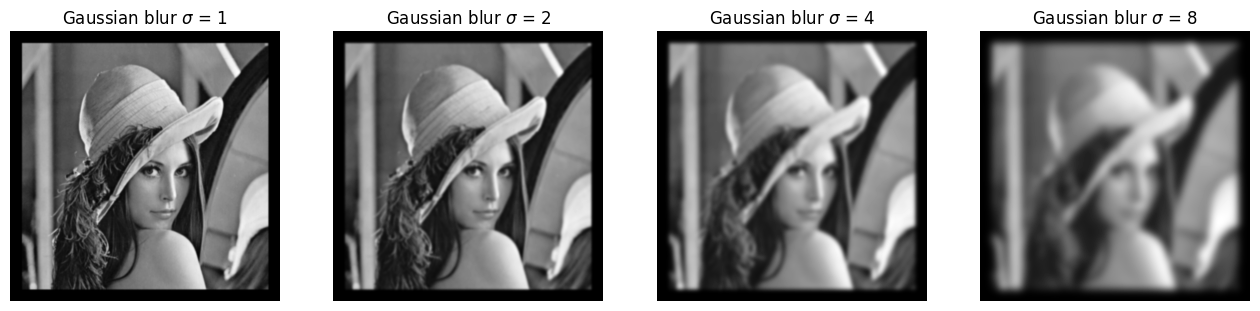

In [21]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    _, _, kernel = get_gaussian_kernel(KERNEL_SIZE, sigma, gaussian_f)
    convolved_img = scipy.signal.convolve2d(img, kernel, mode='full', boundary='fill', fillvalue=0)
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'Gaussian blur $\sigma$ = {sigma}')
    ax[i].axis('off')

#### Using scipy.filters.gaussian

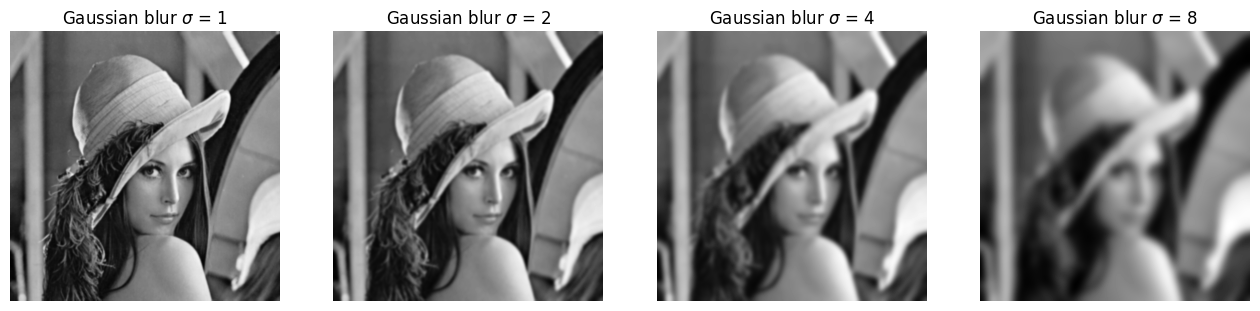

In [22]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    convolved_img = gaussian(img, sigma)
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'Gaussian blur $\sigma$ = {sigma}')
    ax[i].axis('off')

#### Using skimage.ndimage.gaussian_filter

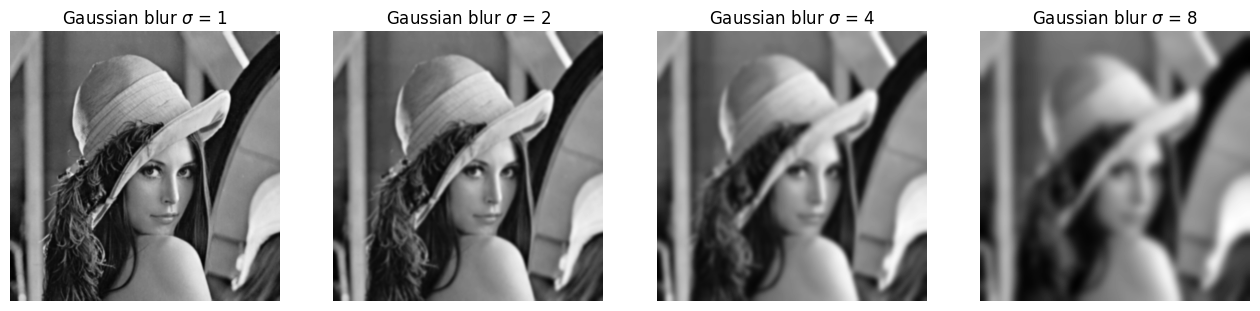

In [23]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    convolved_img = gaussian_filter(img, sigma)
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'Gaussian blur $\sigma$ = {sigma}')
    ax[i].axis('off')

### Task 2: Gradient Magnitude

#### Using Derivatives

#### 1st X-derivative

In [24]:
xs = []
ys = []

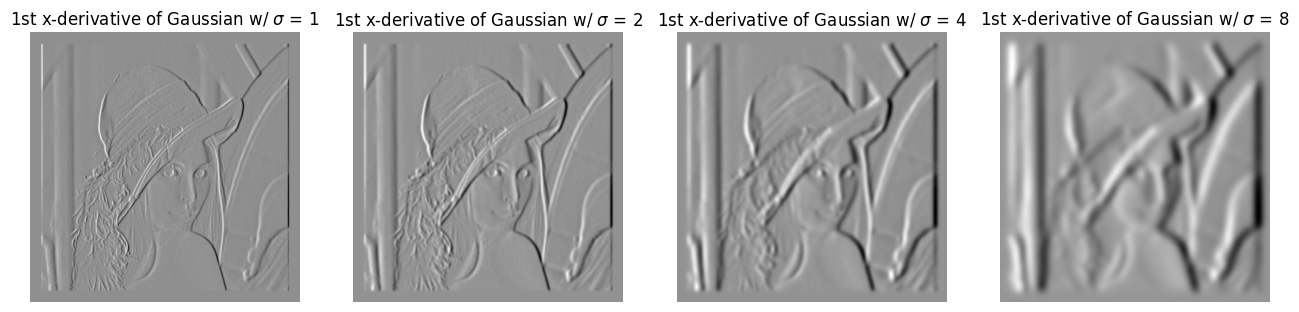

In [25]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    _, _, kernel = get_gaussian_kernel(KERNEL_SIZE, sigma, gaussian_dx_f)
    convolved_img = scipy.signal.convolve2d(img, kernel, mode='full', boundary='fill', fillvalue=0)
    xs.append(convolved_img)
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'1st x-derivative of Gaussian w/ $\sigma$ = {sigma}')
    ax[i].axis('off')

#### Y-axis

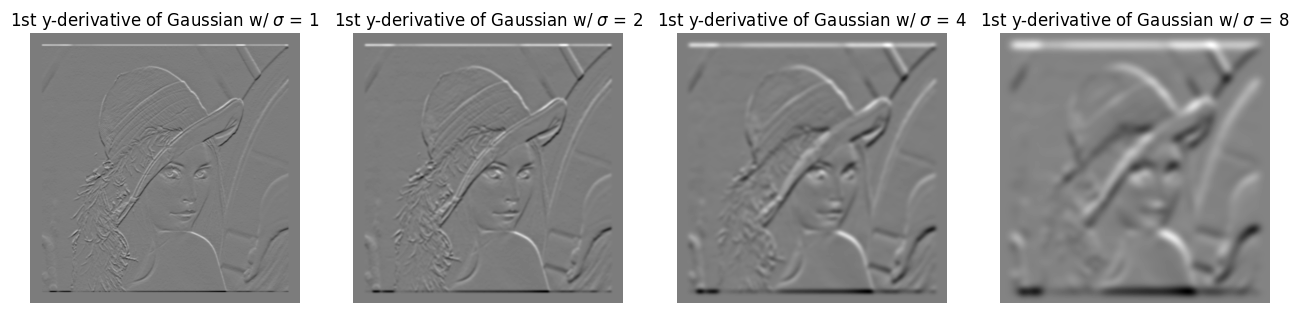

In [26]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    _, _, kernel = get_gaussian_kernel(KERNEL_SIZE, sigma, gaussian_dy_f)
    convolved_img = scipy.signal.convolve2d(img, kernel, mode='full', boundary='fill', fillvalue=0)
    ys.append(convolved_img)
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'1st y-derivative of Gaussian w/ $\sigma$ = {sigma}')
    ax[i].axis('off')

#### Gradient

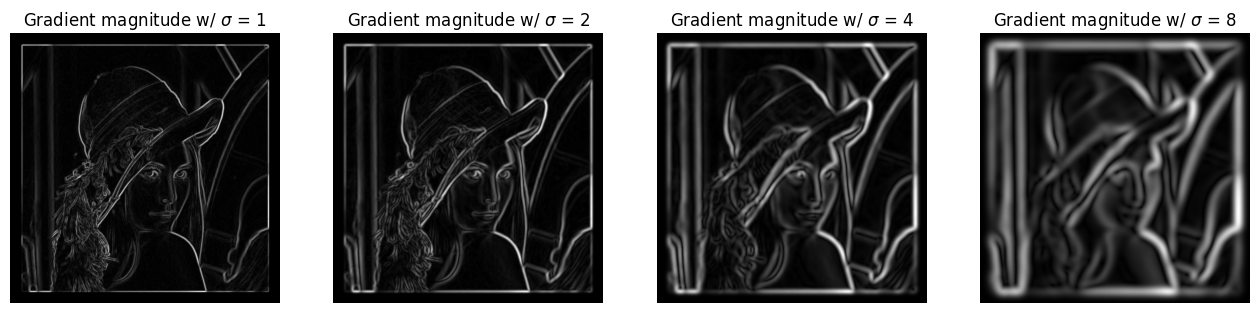

In [27]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    ax[i].imshow(np.hypot(xs[i], ys[i]), cmap='gray')
    ax[i].set_title(fr'Gradient magnitude w/ $\sigma$ = {sigma}')
    ax[i].axis('off')

### Task 3: Laplacian-Gaussian Filtering

#### Using mathematical formula

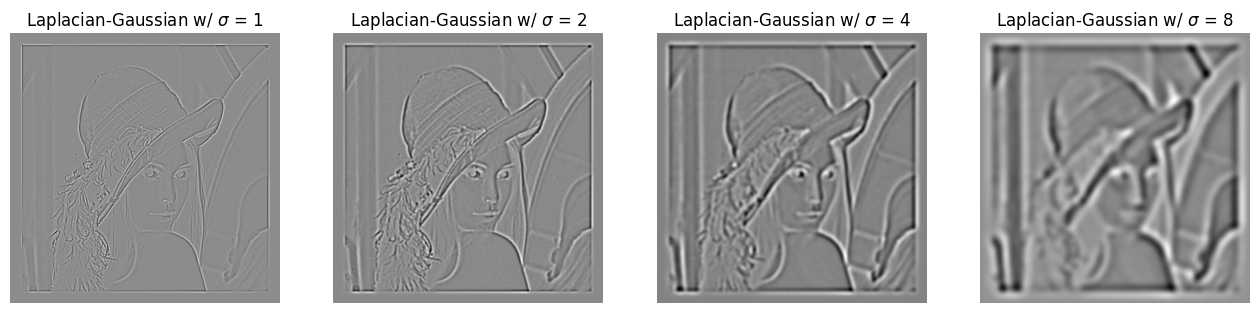

In [28]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    _, _, kernel = get_gaussian_kernel(KERNEL_SIZE, sigma, laplace_gaussian)
    convolved_img = scipy.signal.convolve2d(img, kernel, mode='full', boundary='fill', fillvalue=0)
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'Laplacian-Gaussian w/ $\sigma$ = {sigma}')
    ax[i].axis('off')

#### Using skimage.filters.gaussian_laplace

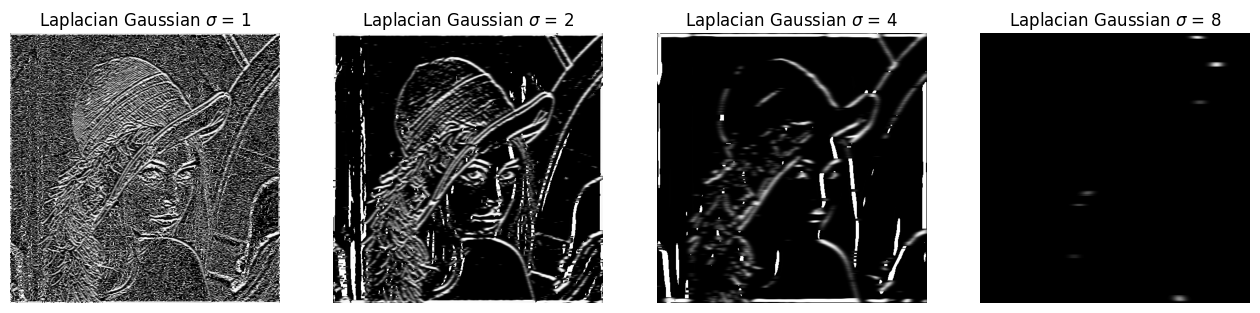

In [29]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    convolved_img = gaussian_laplace(img, sigma, mode="constant")
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'Laplacian Gaussian $\sigma$ = {sigma}')
    ax[i].axis('off')

#### Using scipy.ndimage.laplace

TypeError: laplace() got an unexpected keyword argument 'mode'

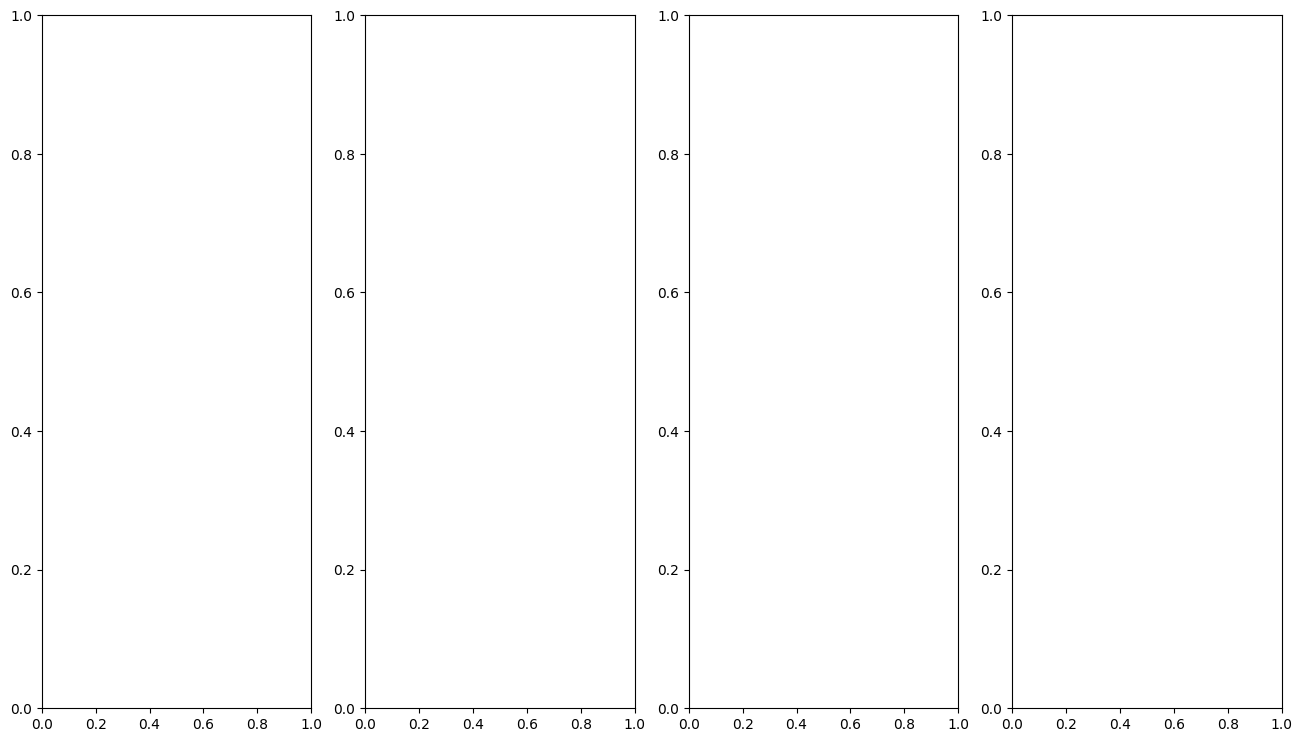

In [30]:
fig, ax = plt.subplots(1, 4, figsize=FIG_SIZE)
for i, sigma in enumerate(SIGMAS):
    convolved_img = laplace(img, sigma, mode="constant")
    ax[i].imshow(convolved_img, cmap='gray')
    ax[i].set_title(fr'Laplacian Gaussian $\sigma$ = {sigma}')
    ax[i].axis('off')

### Task 4: Edge Detection

#### Canny

#### Using OpenCV

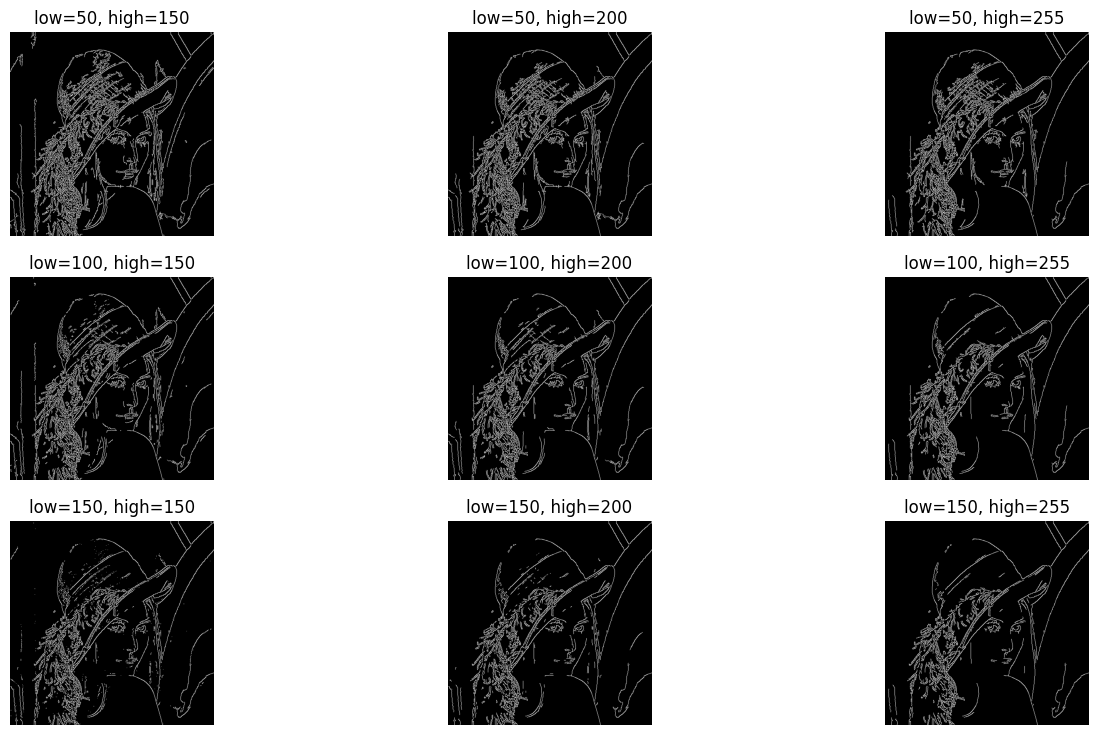

In [31]:
# lows = [50, 100, 200, 300, 400]
# highs = [50, 100, 200, 300, 400]

lows = [50, 100, 150]
highs = [150, 200, 255]

# lows =  [0, 1e-4, 1e-3, 1e-2, None]
# highs =  [1e-1, 1, 10, 100, None]

fig, ax = plt.subplots(len(lows), len(highs), figsize=FIG_SIZE)
for i, low in enumerate(lows):
    for j, high in enumerate(highs):
        canny_out = cv.Canny(img, low, high)
        ax[i, j].imshow(canny_out, cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'low={low}, high={high}')

plt.show()

#### Using skimage.feature.canny

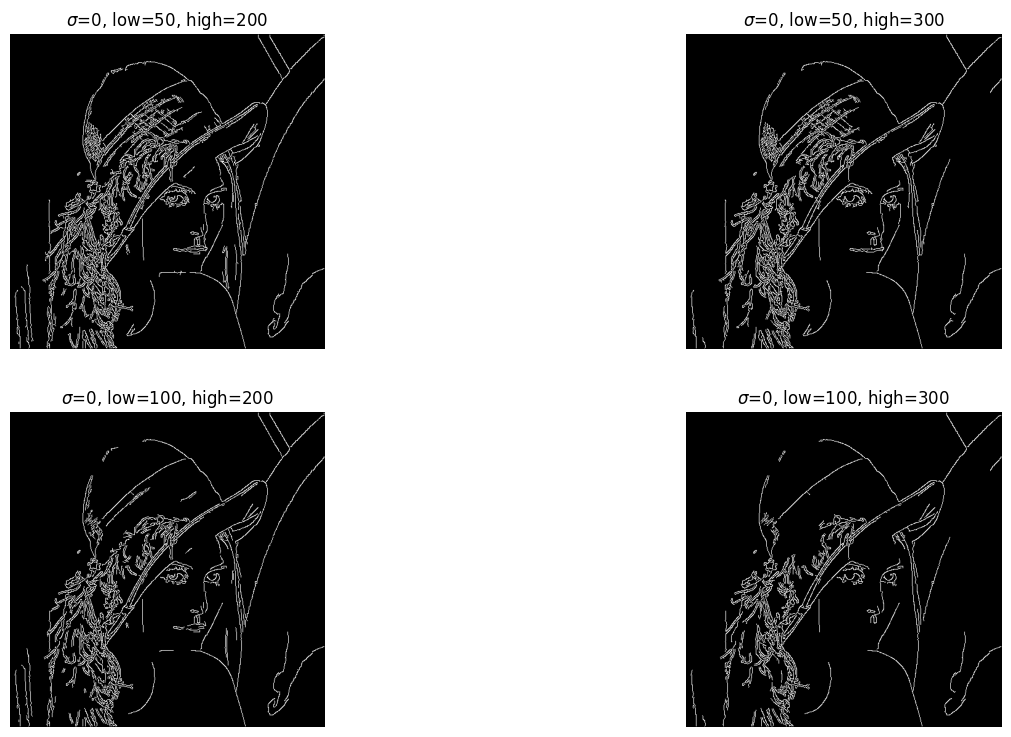

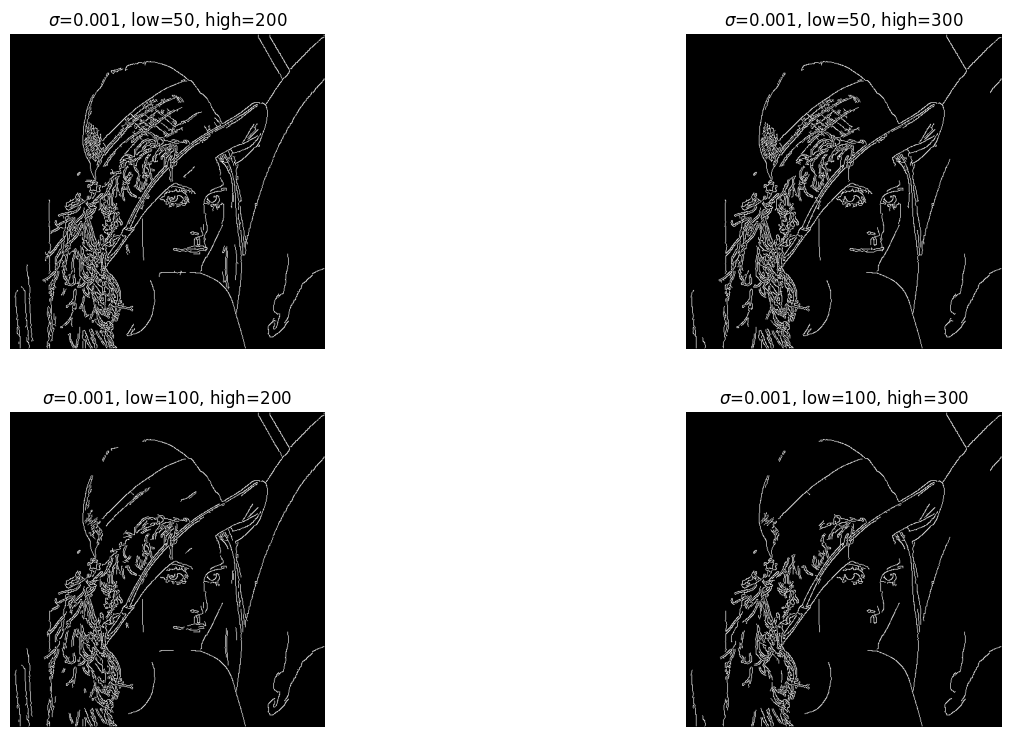

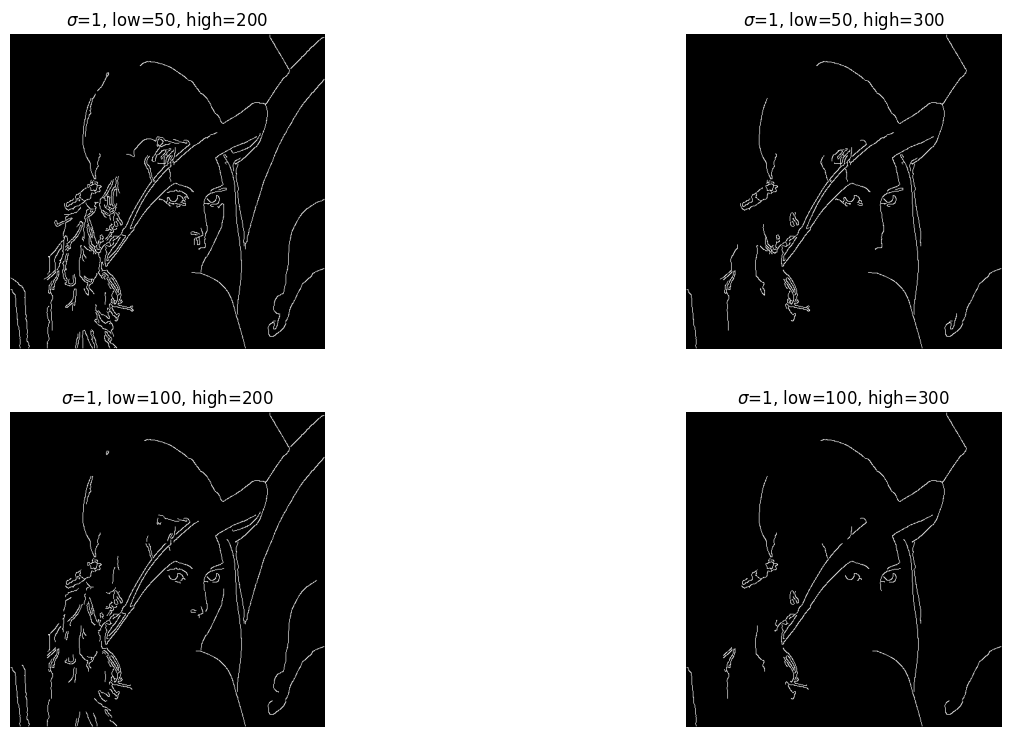

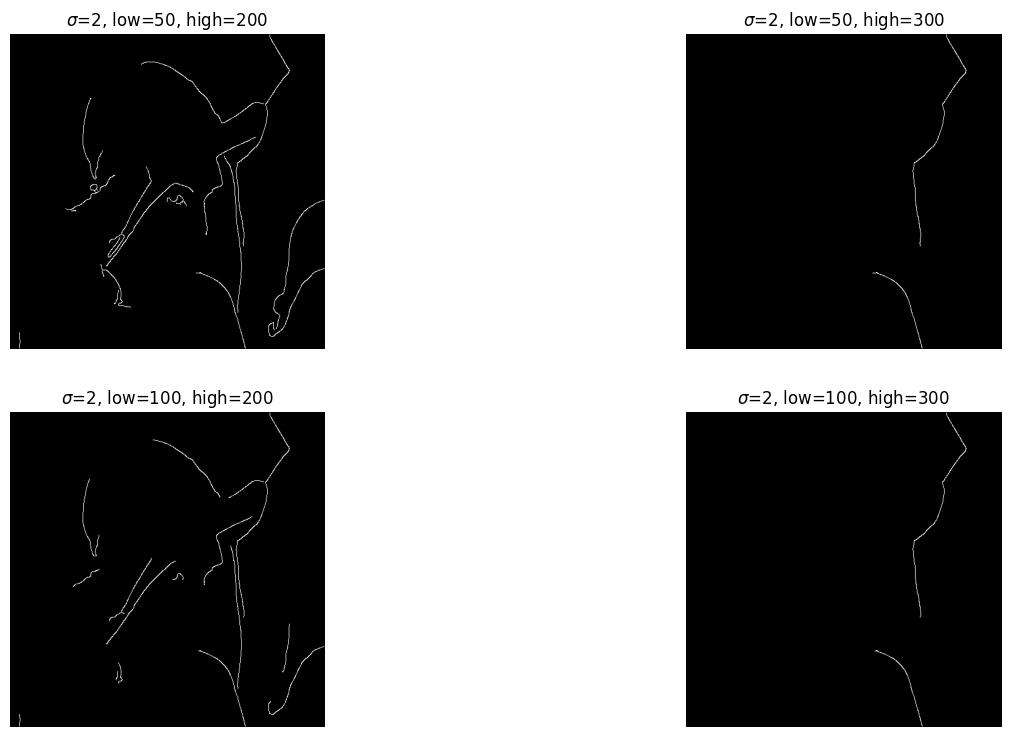

In [32]:
sigmas = [0, 1e-3, 1, 2]
lows =  [50, 100]
highs =  [200, 300]


for sigma in sigmas:
    fig, ax = plt.subplots(len(lows), len(highs), figsize=FIG_SIZE)
    for j, low in enumerate(lows):
        for k, high in enumerate(highs):
            canny_out = canny(img, sigma, low, high)
            ax[j, k].imshow(canny_out, cmap='gray')
            ax[j, k].axis('off')
            ax[j, k].set_title(fr'$\sigma$={sigma}, low={low}, high={high}')
    plt.show()

#### Sobel

(-0.5, 511.5, 511.5, -0.5)

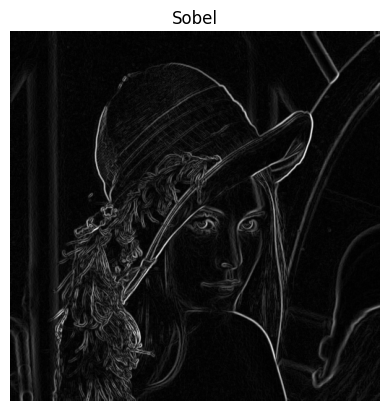

In [33]:
sx = sobel_v(img)
sy = sobel_h(img)
result = np.hypot(sx, sy)
plt.imshow(result, cmap='gray')
plt.title('Sobel')
plt.axis('off')

### Plot derivatives

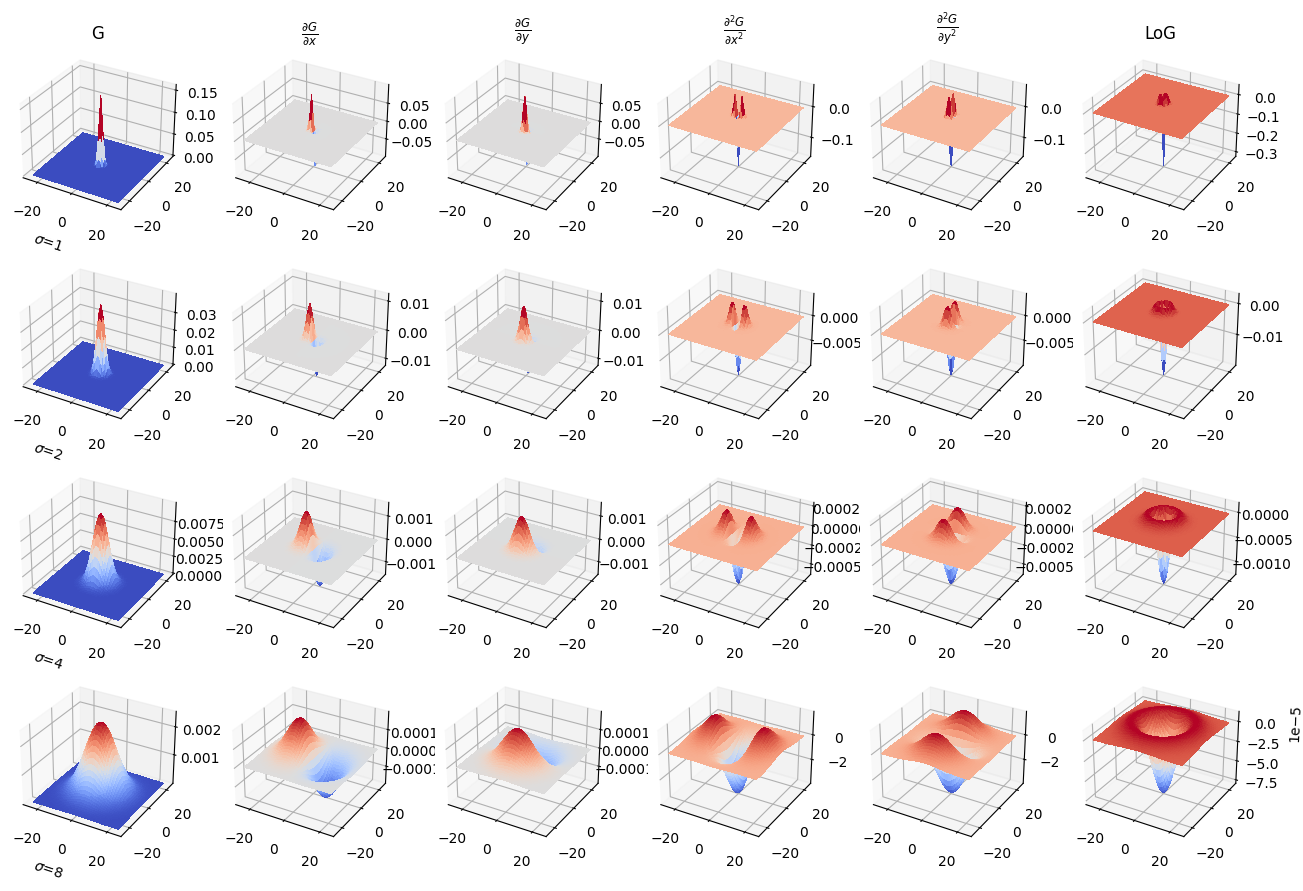

In [34]:
functions = [gaussian_f, gaussian_dx_f, gaussian_dy_f, gaussian_d2x_f, gaussian_d2y_f, laplace_gaussian]
# functions = [gaussian_f, gaussian_dx_f, gaussian_dy_f, laplace_gaussian]

f_names = ["G",
           r"$\frac{\partial G}{\partial x}$",
           r"$\frac{\partial G}{\partial y}$",
           r"$\frac{\partial^2 G}{\partial x^2}$",
           r"$\frac{\partial^2 G}{\partial y^2}$",
           "LoG"]

fig, ax = plt.subplots(len(SIGMAS), len(functions), subplot_kw={"projection": "3d"}, figsize=FIG_SIZE)
fig.subplots_adjust(top=1)
for j, f in enumerate(functions):
    for i, sigma in enumerate(SIGMAS):
        kernel = get_gaussian_kernel(KERNEL_SIZE, sigma, f)
        surf = ax[i, j].plot_surface(*kernel, cmap=cm.coolwarm,
                                     linewidth=0, antialiased=False)
        if i == 0:
            ax[i, j].set_title(f_names[j])

        if j == 0:
            ax[i, j].set_xlabel(fr'$\sigma$={SIGMAS[i]}')

plt.show()

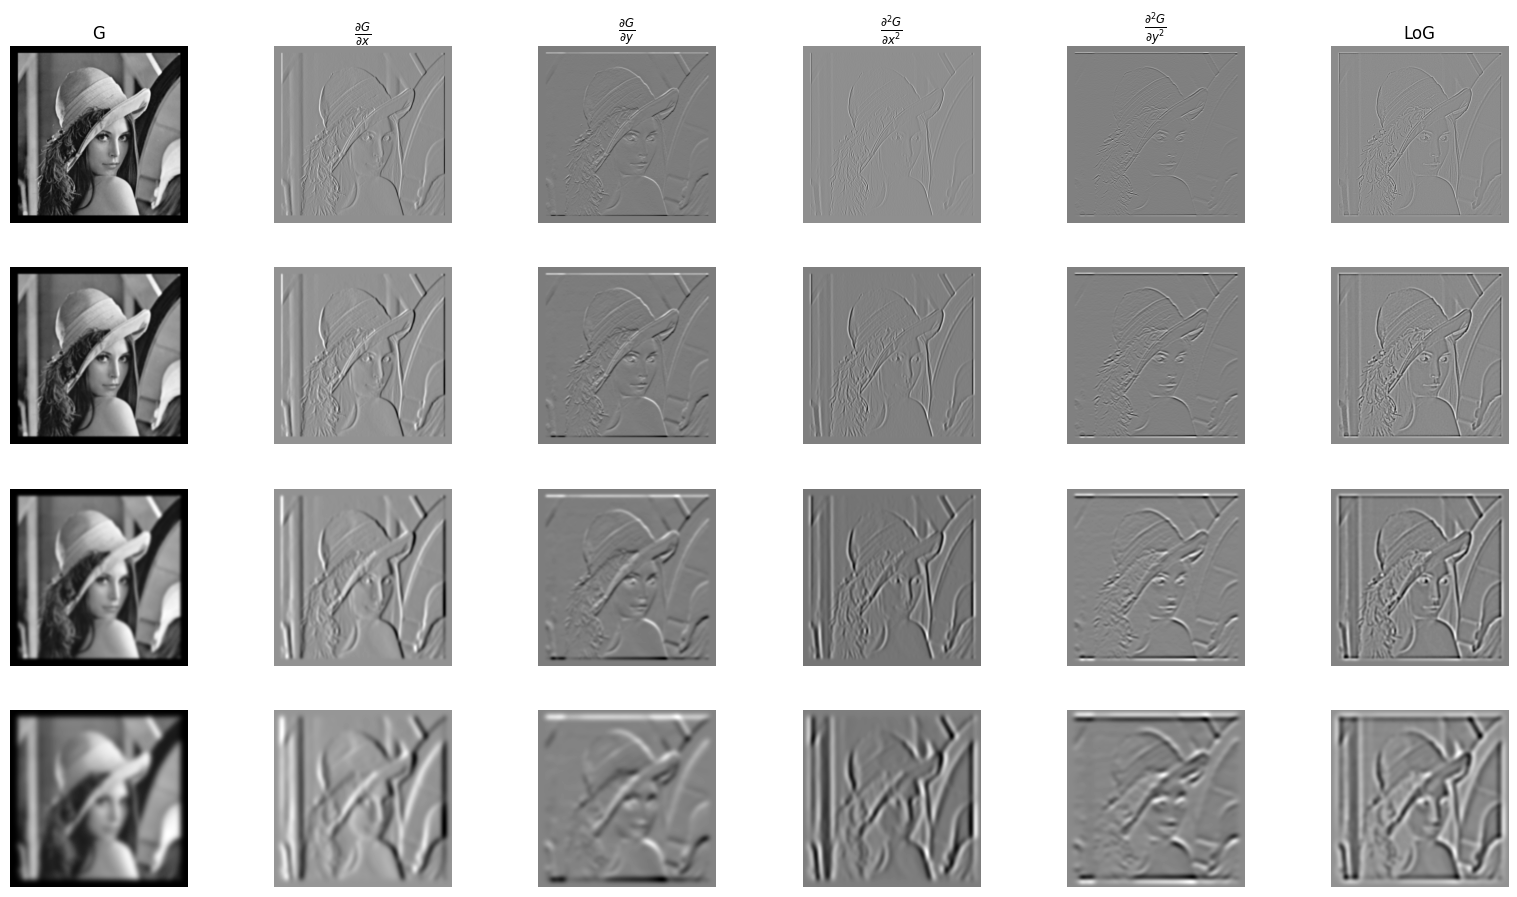

In [35]:
fig, ax = plt.subplots(len(SIGMAS), len(functions), figsize=FIG_SIZE)
fig.tight_layout()
for j, f in enumerate(functions):
    for i, sigma in enumerate(SIGMAS):
        X, Y, kernel = get_gaussian_kernel(KERNEL_SIZE, sigma, f)
        convolved_img = scipy.signal.convolve2d(img, kernel, mode='full', boundary='fill', fillvalue=0)
        if i == 0:
            ax[i, j].set_title(f_names[j])

        if j == 0:
            ax[i, j].set_ylabel(fr'$\sigma$={SIGMAS[i]}', rotation=90)

        ax[i, j].imshow(convolved_img, cmap='gray')
        ax[i, j].axis('off')

plt.show()